<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [23]:
data = pd.read_csv('DMV_Written_Tests.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [25]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Task 3: Visualize the Data
---

In [26]:
# passed = (results == 1).reshape(100, 1)
# failed = (results == 0).reshape(100, 1)

# ax = sns.scatterplot(x = scores[passed[0:, 0], 0],
#                      y = scores[passed[0:, 0], 1],
#                      marker = '^',
#                      c = 'green',
#                      s = 60)

# sns.scatterplot(x = scores[failed[0:, 0], 0],
#                 y = scores[failed[0:, 0], 1],
#                 marker = 'X',
#                 c = ' red',
#                 s = 60)

# ax.set(xlabel ='DMV Written test 1 score', ylabel = 'DMV Written test 2 score')
# ax.lagend(['Passed', 'Failed'])
# plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [28]:
sigmoid(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [29]:
def cost_compute(theta,x,y):
    m = len(y)
    h = sigmoid(np.dot(x, theta))
    error = (y*np.log(h)) + (1-y)*np.log(1-h)
    cost = -1/m * np.sum(error)
    grad = 1/m * np.dot(x.transpose(), (h-y))
    return cost, grad

### Task 6: Cost and Gradient at Initialization
---

In [30]:
# Gradient before optimization process
score_mean = np.mean(scores,axis=0)
score_std = np.std(scores,axis=0)
scores = (scores - score_mean)/score_std

row = scores.shape[0]
col = scores.shape[1]

X = np.append(np.ones((row, 1)), scores, axis =1)
y = results.reshape(row, 1)

theta_init = np.zeros((col + 1, 1))
cost, grad = cost_compute(theta_init, X, y)
# score.shape

In [31]:
print('Cost at initialization', cost)
print('Gradient at initialization', grad)

Cost at initialization 0.6931471805599453
Gradient at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [32]:
# n = np.zeros((col+1, 1))
# print(n)

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [33]:
def gradient_descent(theta, x, y, alpha, iteration):
    costs = []
    for i in range(iteration):
        cost, grad = cost_compute(theta, x, y)
        theta -= (alpha*grad)
        costs.append(cost)
    return theta, costs

In [34]:
theta, costs = gradient_descent(theta_init, X, y, 1, 1500)


In [35]:
print('Theta after running  gradient descent', theta)
print('Resulting cost after optimization', costs[-1])

Theta after running  gradient descent [[1.71835438]
 [3.99258451]
 [3.72493998]]
Resulting cost after optimization 0.2034977018498145


In [36]:
print(costs)


[0.6931471805599453, 0.5594032425456551, 0.480587664853387, 0.4304634223593615, 0.3960564700549832, 0.3709669278894236, 0.35181143821554683, 0.33666258234791707, 0.3243484792498155, 0.31411698799771764, 0.3054632898746155, 0.2980357306412133, 0.29158158307561594, 0.28591434088214984, 0.2808932044202075, 0.2764097679797487, 0.2723791206465764, 0.26873374092404084, 0.2654192108626502, 0.2623911455046634, 0.25961295257859074, 0.25705417096290983, 0.2546892200293838, 0.2524964455319526, 0.2504573827607223, 0.248556181074808, 0.24677914982076546, 0.24511439661778675, 0.24355153668345658, 0.2420814573412626, 0.24069612578706726, 0.23938843105923618, 0.2381520532694505, 0.23698135472344692, 0.23587128874252009, 0.23481732289271778, 0.23381537401406827, 0.2328617529706419, 0.2319531174528029, 0.231086431484239, 0.2302589305394015, 0.22946809137760052, 0.2287116058600059, 0.22798735814416746, 0.22729340475420315, 0.22662795710875624, 0.22598936615723061, 0.22537610883082468, 0.22478677606094838

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of Cost function over Iteration of Gradient Descent')

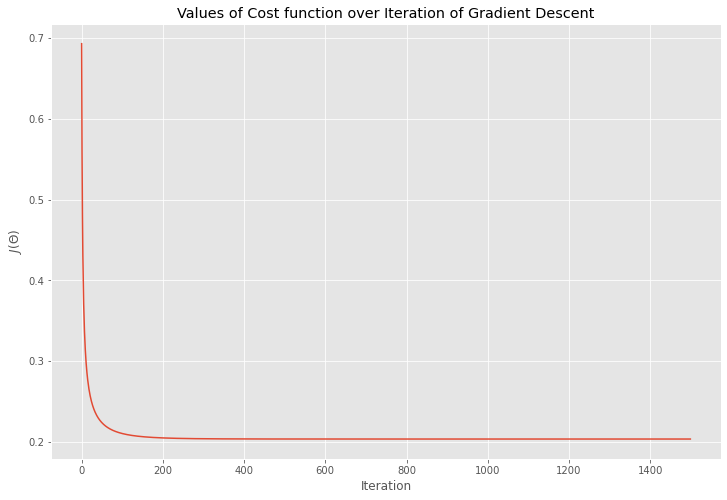

In [37]:
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title("Values of Cost function over Iteration of Gradient Descent")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_0+\theta_1x)}{\theta_2}$

In [38]:
# passed = (results == 1).reshape(100, 1)
# failed = (results == 0).reshape(100, 1)

# ax = sns.scatterplot(x = X[passed[:, 0], 1],
#                      y = X[passed[:, 0], 2],
#                      marker = '^',
#                      c = 'green',
#                      s = 60)

# sns.scatterplot(x = y[failed[:, 0], 1],
#                 y = y[failed[:, 0], 2],
#                 marker = 'X',
#                 c = ' red',
#                 s = 60)

# x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
# y_boundary = -(theta[0]+theta[1]*x_boundary)/theta[2]

# sns.lineplot(x=x_boundary, y=y_boundary, c ='blue')
# plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [42]:
def predict(theta, x):
    results = sigmoid(X.dot(theta))
    return results>0

p = predict(theta, X)
print('Training accuracy: ', np.sum(p==y), '%')

Training accuracy:  60 %


In [43]:
def fit(test):
    test = (test - score_mean)/score_std
    test = np.append(np.ones(1), test)
    probability = sigmoid(test.dot(theta))
    return probability
score = np.array([50,79])
probability = fit(score)

print('By judging the scores in their DMV written test, probability of passing is:', np.round(probability[0], 2))

By judging the scores in their DMV written test, probability of passing is: 0.74
